This notebook uses the

C:\Users\jason\AppData\Local\Temp/ipykernel_2712/1874226226.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=237381.011378, expected=256376.000000
predicted=283922.316243, expected=269839.000000
predicted=288486.050986, expected=278628.000000
predicted=258839.083262, expected=253891.000000
predicted=215610.426910, expected=205136.000000
predicted=193919.782360, expected=157051.000000
predicted=187733.795289, expected=152263.000000
predicted=196120.093008, expected=217530.000000
predicted=250809.688851, expected=236544.000000
predicted=252393.398215, expected=238583.000000
predicted=226638.406668, expected=211241.000000
predicted=183729.892466, expected=175030.000000
predicted=159772.160233, expected=109810.000000
predicted=143114.728728, expected=145122.000000
predicted=181904.185082, expected=178738.000000
predicted=210724.905852, expected=189480.000000
predicted=204696.076238, expected=191907.000000
predicted=184131.353614, expected=185168.000000
predicted=153226.006293, expected=145198.000000
predicted=140078.742566, expected=92017.000000
predicted=117759.253662, expected=123601.

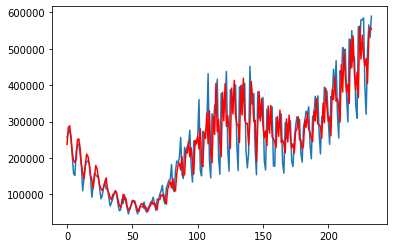

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('../data/processed_data_unaveraged.csv', parse_dates=['date'])
series.index = series.date
series.index = series.index.to_period('D')
series = series['new_cases']
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()